In [1]:
import pandas as pd
import numpy as np

In [98]:
tackeling = pd.read_csv('tackles.csv')

In [103]:
tackeling = tackeling[tackeling['forcedFumble'] == 1]

In [114]:
tackeling.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
81,2022091106,3213,54936,1,0,1,0
208,2022091805,327,52518,1,0,1,0
213,2022091805,797,47800,1,0,1,0
269,2022091103,2740,44872,1,0,1,0
439,2022091100,679,53489,1,0,1,0


In [100]:
players = pd.read_csv('players.csv')

In [5]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [104]:
tackelers = players.merge(tackeling, on = 'nflId')

In [105]:
len(tackelers)

99

In [115]:
tackelers.columns
tackelers.head(10)


,nflId,height,weight,birthDate,collegeName,position,displayName,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle
0,37104,6-5,295,1989-05-06,Ohio State,DT,Cameron Heyward,2022100901,2727,0,1,1,0
1,37724,5-10,199,1989-06-18,Kansas,CB,Chris Harris,2022102000,2508,1,0,1,0
2,38559,6-2,214,1989-02-02,Notre Dame,SS,Harrison Smith,2022101604,3589,1,0,1,0
3,40031,5-11,195,1991-02-09,Rutgers,FS,Logan Ryan,2022091804,2868,0,1,1,0
4,40039,6-1,205,1991-01-24,Rutgers,SS,Duron Harmon,2022100212,1461,0,1,1,0
5,41231,6-3,269,1991-02-22,Buffalo,OLB,Khalil Mack,2022110600,2183,1,0,1,0
6,41483,5-11,190,1992-05-17,Oregon,CB,Terrance Mitchell,2022102305,3425,1,0,1,0
7,42361,6-0,197,1993-01-09,Washington,CB,Marcus Peters,2022092505,3740,1,0,1,0
8,42393,5-11,193,1994-01-02,Florida State,CB,Ronald Darby,2022091200,1092,1,0,1,0
9,42403,6-5,255,1992-11-23,Nebraska,DE,Randy Gregory,2022091200,2546,0,1,1,0


In [145]:
tackelers.set_index(['gameId','playId'], inplace = True)

create small df with forced fumbles column only

In [61]:
tackelers.loc[(2022091801, 247)]

C:\Users\bwebe\AppData\Local\Temp\ipykernel_20032\1291476294.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  tackelers.loc[(2022091801, 247)]


nflId height  weight   birthDate   collegeName position  \
gameId     playId                                                            
2022091801 247     46186   5-10     198  1997-03-18    Pittsburgh       SS   
           247     47881   5-11     226  1996-08-28  Murray State      OLB   

                        displayName  tackle  assist  forcedFumble  \
gameId     playId                                                   
2022091801 247     Jordan Whitehead       0       0             0   
           247      Quincy Williams       1       0             0   

                   pff_missedTackle  
gameId     playId                    
2022091801 247                    1  
           247                    0

In [13]:
smalldf = tackelers.loc[:,'forcedFumble']
smalldf.head()

gameId      playId
2022091107  1803      0
2022092505  1067      0
2022100202  2284      0
2022092505  654       0
2022101606  2695      0
Name: forcedFumble, dtype: int64

In [148]:
plays = pd.read_csv('plays.csv')

In [149]:
plays.rename(columns= {'ballCarrierId':'nflId'}, inplace=True)
carriers = players.merge(plays, on = 'nflId')

In [150]:
carriers.set_index(['gameId','playId'], inplace=True)

In [151]:
carriers.drop('ballCarrierDisplayName',axis=1,inplace=True)
carriers.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'passLength', 'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'],
      dtype='object')

In [42]:
combined = pd.merge(carriers, tackelers, left_index=True, right_index=True, how='outer')
combined.head(10)

nflId_x height_x  weight_x birthDate_x collegeName_x  \
gameId     playId                                                         
2022090800 56          NaN      NaN       NaN         NaN           NaN   
           80          NaN      NaN       NaN         NaN           NaN   
           101         NaN      NaN       NaN         NaN           NaN   
           122         NaN      NaN       NaN         NaN           NaN   
           146         NaN      NaN       NaN         NaN           NaN   
           146         NaN      NaN       NaN         NaN           NaN   
           167         NaN      NaN       NaN         NaN           NaN   
           191         NaN      NaN       NaN         NaN           NaN   
           191         NaN      NaN       NaN         NaN           NaN   
           212         NaN      NaN       NaN         NaN           NaN   

                  position_x displayName_x ballCarrierDisplayName  \
gameId     playId                                                   
2022090800 56            NaN           NaN                    NaN   
           80            NaN           NaN                    NaN   
           101           NaN           NaN                    NaN   
           122           NaN           NaN                    NaN   
           146           NaN           NaN                    NaN   
           146           NaN           NaN                    NaN   
           167           NaN           NaN                    NaN   
           191           NaN           NaN                    NaN   
           191           NaN           NaN                    NaN   
           212           NaN           NaN                    NaN   

                  playDescription  quarter  ...  height_y  weight_y  \
gameId     playId                           ...                       
2022090800 56                 NaN      NaN  ...       6-1       208   
           80                 NaN      NaN  ...       6-2       230   
           101                NaN      NaN  ...      5-11       184   
           122                NaN      NaN  ...       6-0       242   
           146                NaN      NaN  ...       6-0       242   
           146                NaN      NaN  ...       6-4       330   
           167                NaN      NaN  ...       6-5       240   
           191                NaN      NaN  ...       6-1       312   
           191                NaN      NaN  ...       6-5       252   
           212                NaN      NaN  ...       6-0       242   

                  birthDate_y   collegeName_y position_y     displayName_y  \
gameId     playId                                                            
2022090800 56      1994-10-24   Florida State         CB      Jalen Ramsey   
           80             NaN  South Carolina        ILB      Ernest Jones   
           101     1991-08-29          Oregon         CB         Troy Hill   
           122     1990-06-27      Utah State        ILB      Bobby Wagner   
           146     1990-06-27      Utah State        ILB      Bobby Wagner   
           146     1995-03-21         Alabama         DT  A'Shawn Robinson   
           167     1992-09-08         Georgia         DE     Leonard Floyd   
           191     1996-05-06      Washington         NT       Greg Gaines   
           191     1998-08-25         Alabama        OLB     Terrell Lewis   
           212     1990-06-27      Utah State        ILB      Bobby Wagner   

                  tackle  assist  forcedFumble pff_missedTackle  
gameId     playId                                                
2022090800 56          1       0             0                0  
           80          1       0             0                0  
           101         1       0             0                0  
           122         1       0             0                0  
           146         0       1             0                0  
           146         0       1     

In [43]:
combined.shape

(17426, 50)

In [16]:
combined.columns

Index(['nflId_x', 'height_x', 'weight_x', 'birthDate_x', 'collegeName_x',
       'position_x', 'displayName_x', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'nflId_y',
       'height_y', 'weight_y', 'birthDate_y', 'collegeName_y', 'position_y',
       'displayName_y', 'tackle', 'assist', 'forcedFumble',
       'pff_missedTackle'],
      dtype='object')

In [39]:

combined[combined['forcedFumble'] == 1]

,,nflId_x,height_x,weight_x,birthDate_x,collegeName_x,position_x,displayName_x,ballCarrierDisplayName,playDescription,quarter,...,height_y,weight_y,birthDate_y,collegeName_y,position_y,displayName_y,tackle,assist,forcedFumble,pff_missedTackle
gameId,playId,,,,,,,,,,,,,,,,,,,,,


In [62]:
pbp = pd.read_csv('pbp.csv')

In [86]:
pbp.set_index(['gameId','playId'], inplace=True)

In [87]:
pbp.sort_values(by=['gameId','playId'],inplace=True)
pbp.head(20)

ballCarrierId  tacklerNflId ballCarrierDisplayName  \
gameId     playId                                                       
2022090800 56              42489       43294.0           Stefon Diggs   
           80              46076       53532.0             Josh Allen   
           80              46076       53532.0             Josh Allen   
           101             47857       42816.0       Devin Singletary   
           122             47857       38577.0       Devin Singletary   
           146             47857       38577.0       Devin Singletary   
           146             47857       38577.0       Devin Singletary   
           146             47857       43335.0       Devin Singletary   
           146             47857       43335.0       Devin Singletary   
           167             42489       43298.0           Stefon Diggs   
           191             52494       47917.0              Zack Moss   
           191             52494       47917.0              Zack Moss   
           191             52494       52492.0              Zack Moss   
           191             52494       52492.0              Zack Moss   
           212             52494       38577.0              Zack Moss   
           299             47853       53459.0      Darrell Henderson   
           343             47853       46085.0      Darrell Henderson   
           393             47853       46232.0      Darrell Henderson   
           414             43399       52647.0           Tyler Higbee   
           486             44881       40166.0            Cooper Kupp   

                  ballCarrierPos       tacklerName tacklerPos  quarter  down  \
gameId     playId                                                              
2022090800 56                 WR      Jalen Ramsey         CB        1     1   
           80                 QB      Ernest Jones        ILB        1     2   
           80                OLB      Ernest Jones        ILB        1     2   
           101                RB         Troy Hill         CB        1     1   
           122                RB      Bobby Wagner        ILB        1     2   
           146                RB      Bobby Wagner        ILB        1     1   
           146                RB      Bobby Wagner        ILB        1     1   
           146                RB  A'Shawn Robinson         DT        1     1   
           146                RB  A'Shawn Robinson         DT        1     1   
           167                WR     Leonard Floyd         DE        1     2   
           191                RB       Greg Gaines         NT        1     1   
           191                RB       Greg Gaines         NT        1     1   
           191                RB     Terrell Lewis        OLB        1     1   
           191                RB     Terrell Lewis        OLB        1     1   
           212                RB      Bobby Wagner        ILB        1     2   
           299                RB  Gregory Rousseau         DE        1     1   
           343                RB  Tremaine Edmunds        ILB        1     2   
           393                RB        Tim Settle         DT        1     1   
           414                TE      Dane Jackson         CB        1     2   
           486                WR      Jordan Poyer         SS        1     3   

                   yardsToGo possessionTeam  ... ballCarrierrOrientation  \
gameId     playId                            ...                           
2022090800 56             10            BUF  ...                  100.54   
           80              4            BUF  ...                  318.57   
           80              4            BUF  ...                  318.57   
           101            10            BUF  ...                  218.73   
           122             3            BUF  ...                  118.78   
           146            10            BUF  ...                  122.92   
           146            10            BUF

In [65]:
pbp.columns

Index(['ballCarrierId', 'tacklerNflId', 'ballCarrierDisplayName',
       'ballCarrierPos', 'tacklerName', 'tacklerPos', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'playDescription',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'assist', 'forcedFumble_x', 'pff_missedTackle',
       'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDire

In [66]:
pbp['tacklerMass'] = pbp['tacklerWeight'] / 2.2

In [67]:
pbp['ballCarrierMass'] = pbp['ballCarrierWeight'] / 2.2
        
pbp['differenceAngularDirection'] = abs(pbp['tacklerDirectionAngle'] - pbp['ballCarrierDirectionAngle'])

In [68]:
pbp['forceTackler'] = pbp['tacklerMass'] * pbp['tacklerAcc']
pbp['forceBallCarrier'] = pbp['ballCarrierMass'] * pbp['ballCarrierrAcc']

In [69]:
pbp['forceTackler']

gameId      playId
2022090800  56        299.709091
            80        203.863636
            80        203.863636
            101       415.672727
            122       319.000000
                         ...    
2022110700  3658      300.822727
            3686      121.090909
            3707      228.000000
            3740      518.440909
            3787      306.386364
Name: forceTackler, Length: 26813, dtype: float64

In [70]:
def percentOfBallCarrierForce(x):
    percent_force_component = 0
    if (x <= 90): 
        percent_force_component = np.cos(x * (np.pi/180)) * (-1)
    elif ((x > 90) and (x <= 180)):
        percent_force_component = np.sin((x-90) * (np.pi/180))
    elif ((x > 180) and (x <= 270)):
        percent_force_component = np.cos((x-180) * (np.pi/180))
    else:
        percent_force_component = np.sin((x-270) * (np.pi/180)) * (-1)
    
    return percent_force_component
        

In [71]:
pbp['addedForceComponent'] = pbp['differenceAngularDirection'].apply(lambda x: percentOfBallCarrierForce(x)) * pbp['forceBallCarrier']

In [72]:
pbp['forceGeneratedSpotTackle'] = pbp['addedForceComponent'] + pbp['forceTackler']

In [80]:
pbp[['forceTackler','forceGeneratedSpotTackle','forceBallCarrier', 'differenceAngularDirection','tacklerDirectionAngle','ballCarrierDirectionAngle']].tail()

,forceTackler,forceGeneratedSpotTackle,forceBallCarrier,differenceAngularDirection,tacklerDirectionAngle,ballCarrierDirectionAngle
26808,300.822727,50.225054,291.563636,30.74,196.01,165.27
26809,121.090909,208.070371,326.090909,105.47,112.45,217.92
26810,228.000000,48.623100,278.136364,49.84,251.42,301.26
26811,518.440909,84.245011,435.427273,4.31,183.73,188.04
26812,306.386364,-87.041608,409.509091,16.11,137.50,121.39


In [82]:
pbp = pd.read_csv('pbp.csv')

In [20]:
pbp = pd.merge(pbp, smalldf, left_index=True, right_index=True)
pbp.columns

Index(['ballCarrierId', 'tacklerNflId', 'ballCarrierDisplayName',
       'ballCarrierPos', 'tacklerName', 'tacklerPos', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'playDescription',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'assist', 'forcedFumble_x', 'pff_missedTackle',
       'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDire

In [22]:
len(pbp[pbp['pff_missedTackle'] == 1])

12654

In [78]:
file_name = 'pbp.csv'
pbp.to_csv(file_name, sep=',')

In [220]:
import seaborn as sns

<AxesSubplot:xlabel='forceGeneratedSpotTackle', ylabel='forcedFumble'>

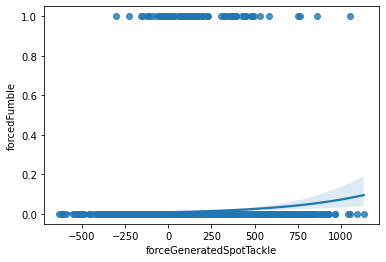

In [221]:
x = pbp['forceGeneratedSpotTackle']
y = pbp['forcedFumble']

sns.regplot(x=x, y=y, data=pbp, logistic=True)

<AxesSubplot:xlabel='balance', ylabel='default'>

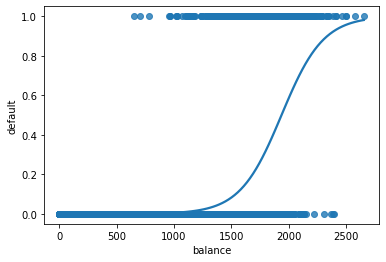

In [69]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

x = data['balance']
y = data['default']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

In [37]:
len(pbp[pbp['forcedFumble'] == 1])

7

In [28]:
tracking1 = pd.read_csv('tracking_week_1.csv')
tracking2 = pd.read_csv('tracking_week_2.csv')
tracking3 = pd.read_csv('tracking_week_3.csv')
tracking4 = pd.read_csv('tracking_week_4.csv')
tracking5 = pd.read_csv('tracking_week_5.csv')
tracking6 = pd.read_csv('tracking_week_6.csv')
tracking7 = pd.read_csv('tracking_week_7.csv')
tracking8 = pd.read_csv('tracking_week_8.csv')
tracking9 = pd.read_csv('tracking_week_9.csv')

In [164]:
tracking3 = tracking3[(tracking3['event'] == 'fumble')]
tracking4 = tracking4[(tracking4['event'] == 'fumble')]
tracking5 = tracking5[(tracking5['event'] == 'fumble')]
tracking6 = tracking6[(tracking6['event'] == 'fumble')]
tracking7 = tracking7[(tracking7['event'] == 'fumble')]
tracking8 = tracking8[(tracking8['event'] == 'fumble')]
tracking9 = tracking9[(tracking9['event'] == 'fumble')]

In [37]:
len(tracking2)

253

In [90]:
pbp = pbp.drop(['forcedFumble_x','forcedFumble_y'],axis=1)


ballCarrierId  tacklerNflId ballCarrierDisplayName  \
gameId     playId                                                       
2022091801 247             52523       46186.0        Harrison Bryant   
           247             52523       46186.0        Harrison Bryant   
           247             52523       47881.0        Harrison Bryant   
           247             52523       47881.0        Harrison Bryant   

                  ballCarrierPos       tacklerName tacklerPos  quarter  down  \
gameId     playId                                                              
2022091801 247                TE  Jordan Whitehead         SS        1     2   
           247                TE  Jordan Whitehead         SS        1     2   
           247                TE   Quincy Williams        OLB        1     2   
           247                TE   Quincy Williams        OLB        1     2   

                   yardsToGo possessionTeam  ... ballCarrierrAcc  \
gameId     playId                            ...                   
2022091801 247             2            CLE  ...            0.85   
           247             2            CLE  ...            0.85   
           247             2            CLE  ...            0.85   
           247             2            CLE  ...            0.85   

                  ballCarrierrOrientation ballCarrierDirectionAngle  \
gameId     playId                                                     
2022091801 247                     210.25                    276.53   
           247                     210.25                    276.53   
           247                     210.25                    276.53   
           247                     210.25                    276.53   

                   tacklerMass ballCarrierMass  differenceAngularDirection  \
gameId     playId                                                            
2022091801 247       90.000000      109.090909                       20.04   
           247       90.000000      109.090909                       20.04   
           247      102.727273      109.090909                       62.56   
           247      102.727273      109.090909                       62.56   

                   forceTackler forceBallCarrier  addedForceComponent  \
gameId     playId                                                       
2022091801 247            118.8        92.727273           -87.112972   
           247            118.8        92.727273           -87.112972   
           247             45.2        92.727273           -42.730534   
           247             45.2        92.727273           -42.730534   

                   forceGeneratedSpotTackle  
gameId     playId                            
2022091801 247                    31.687028  
           247                    31.687028  
           247                     2.469466  
           247                     2.469466  

[4 rows x 61 columns]

In [93]:
pbp = pbp[pbp['tackle'] == 1].drop(['assist','pff_missedTackle'],axis=1)

In [96]:
groups = pbp.groupby(level=pbp.index.names)
pbp = groups.first()

In [97]:
play247 = pbp.loc[(2022091801, 247)]
play247

ballCarrierId                                                                   52523
tacklerNflId                                                                  47881.0
ballCarrierDisplayName                                                Harrison Bryant
ballCarrierPos                                                                     TE
tacklerName                                                           Quincy Williams
tacklerPos                                                                        OLB
quarter                                                                             1
down                                                                                2
yardsToGo                                                                           2
possessionTeam                                                                    CLE
defensiveTeam                                                                     NYJ
playDescription                     (12:59) J.Brissett

In [155]:
fum2 = tracking2.merge(tackelers, on=['gameId','playId','displayName'])
fum2.drop('nflId_x',axis=1,inplace=True)
fum2.rename(columns={'nflId_y':'nflId'},inplace=True)
fum2.set_index(['gameId','playId'],inplace=True)
fum2

displayName  frameId  \
gameId     playId                                     
2022091801 3557    Jeremiah Owusu-Koramoah       13   
2022091804 56                  Devin White       20   
           2868                 Logan Ryan       44   
2022091805 327               Darnay Holmes       46   
           797             Dexter Lawrence       25   
2022091807 3338                Darren Hall       12   
2022091809 2769                  Vonn Bell       27   
2022091811 4443              Zaven Collins       20   
           4519             Isaiah Simmons       30   

                                         time  jerseyNumber club  \
gameId     playId                                                  
2022091801 3557    2022-09-18 15:44:59.000000          28.0  CLE   
2022091804 56      2022-09-18 13:03:44.900000          45.0   TB   
           2868    2022-09-18 15:05:04.900000          26.0   TB   
2022091805 327     2022-09-18 13:14:30.099999          30.0  NYG   
           797     2022-09-18 13:31:27.500000          97.0  NYG   
2022091807 3338    2022-09-18 18:45:35.000000          34.0  ATL   
2022091809 2769    2022-09-18 18:33:30.400000          24.0  CIN   
2022091811 4443    2022-09-18 19:50:50.700000          25.0  ARI   
           4519    2022-09-18 19:53:09.299999           9.0  ARI   

                  playDirection      x      y     s     a  ...  nflId  height  \
gameId     playId                                          ...                  
2022091801 3557           right  21.39  16.16  2.75  5.80  ...  53481     6-1   
2022091804 56              left  81.28   5.90  5.86  2.37  ...  47788     6-0   
           2868            left  21.14  26.22  2.04  5.24  ...  40031    5-11   
2022091805 327             left  71.06   9.75  1.22  0.71  ...  52518    5-10   
           797             left  63.48   1.71  7.79  4.13  ...  47800     6-4   
2022091807 3338            left  66.10  20.85  8.25  2.02  ...  53537     6-0   
2022091809 2769           right  83.11  28.60  3.04  3.25  ...  43350    5-11   
2022091811 4443           right  64.00  31.15  5.62  3.07  ...  53445     6-4   
           4519           right  72.20  48.46  2.82  6.38  ...  52416     6-3   

                   weight   birthDate      collegeName position  tackle  \
gameId     playId                                                         
2022091801 3557       215         NaN       Notre Dame      OLB       1   
2022091804 56         237  1998-02-17  Louisiana State      ILB       0   
           2868       195  1991-02-09          Rutgers       FS       0   
2022091805 327        198  1998-06-23             UCLA       CB       1   
           797        342  1997-11-12          Clemson       DT       1   
2022091807 3338       190         NaN  San Diego State       CB       1   
2022091809 2769       205  1994-12-12       Ohio State       SS       0   
2022091811 4443       260         NaN            Tulsa      OLB       0   
           4519       225  1998-07-26          Clemson       DB       1   

                  assist forcedFumble pff_missedTackle  
gameId     playId                                       
2022091801 3557        0            1                0  
2022091804 56          1            1                0  
           2868        1            1                0  
2022091805 327         0            1                0  
           797         0            1                0  
2022091807 3338        0            1                0  
2022091809 2769        1            1                0  
2022091811 4443        1            1                0  
           4519        0            1                0  

[9 rows x 24 columns]

In [156]:
fumb2 = tracking2.merge(carriers, on=['gameId','playId','displayName'])
fumb2.drop('nflId_x',axis=1,inplace=True)
fumb2.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb2.set_index(['gameId','playId'],inplace=True)
fumb2

displayName  frameId                        time  \
gameId     playId                                                        
2022091801 3557     Tyler Conklin       13  2022-09-18 15:44:59.000000   
2022091804 56       Adam Prentice       20  2022-09-18 13:03:44.900000   
           2868       Mark Ingram       44  2022-09-18 15:05:04.900000   
           4190       Chris Olave       15  2022-09-18 16:02:27.599999   
2022091805 797     Baker Mayfield       25  2022-09-18 13:31:27.500000   
2022091807 3338       Cooper Kupp       12  2022-09-18 18:45:35.000000   
2022091809 2769    Dalton Schultz       27  2022-09-18 18:33:30.400000   
2022091811 4443    Hunter Renfrow       20  2022-09-18 19:50:50.700000   
           4519    Hunter Renfrow       30  2022-09-18 19:53:09.299999   
2022091900 3598      Malik Willis       42  2022-09-19 22:08:24.799999   

                   jerseyNumber club playDirection      x      y     s     a  \
gameId     playId                                                              
2022091801 3557            83.0  NYJ         right  20.75  15.43  2.68  1.36   
2022091804 56              46.0   NO          left  82.38   4.40  2.42  0.98   
           2868            22.0   NO          left  21.84  26.50  4.30  4.56   
           4190            12.0   NO         right  71.66   4.56  6.70  5.30   
2022091805 797              6.0  CAR          left  63.14   1.43  8.02  1.73   
2022091807 3338            10.0   LA          left  66.56  19.98  7.76  0.31   
2022091809 2769            86.0  DAL         right  84.07  29.35  2.86  2.55   
2022091811 4443            13.0   LV         right  64.65  31.51  4.38  3.17   
           4519            13.0   LV         right  71.98  49.13  2.89  3.67   
2022091900 3598             7.0  TEN          left  39.79  16.68  4.68  4.40   

                   ...  preSnapHomeTeamWinProbability  \
gameId     playId  ...                                  
2022091801 3557    ...                       0.900671   
2022091804 56      ...                       0.445718   
           2868    ...                       0.626479   
           4190    ...                       0.015939   
2022091805 797     ...                       0.627357   
2022091807 3338    ...                       0.918286   
2022091809 2769    ...                       0.852980   
2022091811 4443    ...                       0.417919   
           4519    ...                       0.517898   
2022091900 3598    ...                       0.999132   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022091801 3557                            0.099329   
2022091804 56                              0.554282   
           2868                            0.373521   
           4190                            0.984061   
2022091805 797                             0.372643   
2022091807 3338                            0.081714   
2022091809 2769                            0.147020   
2022091811 4443                            0.582081   
           4519                            0.482102   
2022091900 3598                            0.000868   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022091801 3557                       0.017727                    -0.017727   
2022091804 56                        -0.017580                     0.017580   
           2868                      -0.170602                     0.170602   
           4190                      -0.012533                     0.012533   
2022091805 797                        0.025202                    -0.025202   
2022091807 3338                      -0.085527                     0.085527   
2022091809 2769                      -0.119254                     0.119254   
2022091811 4443                       0.143512                    -0.143512   
           4519                     

In [161]:
fumble2 = pd.merge(fum2,fumb2,left_index=True,right_index=True)
fumble2

displayName_x  frameId_x  \
gameId     playId                                       
2022091801 3557    Jeremiah Owusu-Koramoah         13   
2022091804 56                  Devin White         20   
           2868                 Logan Ryan         44   
2022091805 797             Dexter Lawrence         25   
2022091807 3338                Darren Hall         12   
2022091809 2769                  Vonn Bell         27   
2022091811 4443              Zaven Collins         20   
           4519             Isaiah Simmons         30   

                                       time_x  jerseyNumber_x club_x  \
gameId     playId                                                      
2022091801 3557    2022-09-18 15:44:59.000000            28.0    CLE   
2022091804 56      2022-09-18 13:03:44.900000            45.0     TB   
           2868    2022-09-18 15:05:04.900000            26.0     TB   
2022091805 797     2022-09-18 13:31:27.500000            97.0    NYG   
2022091807 3338    2022-09-18 18:45:35.000000            34.0    ATL   
2022091809 2769    2022-09-18 18:33:30.400000            24.0    CIN   
2022091811 4443    2022-09-18 19:50:50.700000            25.0    ARI   
           4519    2022-09-18 19:53:09.299999             9.0    ARI   

                  playDirection_x    x_x    y_x   s_x   a_x  ...  \
gameId     playId                                            ...   
2022091801 3557             right  21.39  16.16  2.75  5.80  ...   
2022091804 56                left  81.28   5.90  5.86  2.37  ...   
           2868              left  21.14  26.22  2.04  5.24  ...   
2022091805 797               left  63.48   1.71  7.79  4.13  ...   
2022091807 3338              left  66.10  20.85  8.25  2.02  ...   
2022091809 2769             right  83.11  28.60  3.04  3.25  ...   
2022091811 4443             right  64.00  31.15  5.62  3.07  ...   
           4519             right  72.20  48.46  2.82  6.38  ...   

                   preSnapHomeTeamWinProbability  \
gameId     playId                                  
2022091801 3557                         0.900671   
2022091804 56                           0.445718   
           2868                         0.626479   
2022091805 797                          0.627357   
2022091807 3338                         0.918286   
2022091809 2769                         0.852980   
2022091811 4443                         0.417919   
           4519                         0.517898   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022091801 3557                            0.099329   
2022091804 56                              0.554282   
           2868                            0.373521   
2022091805 797                             0.372643   
2022091807 3338                            0.081714   
2022091809 2769                            0.147020   
2022091811 4443                            0.582081   
           4519                            0.482102   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022091801 3557                       0.017727                    -0.017727   
2022091804 56                        -0.017580                     0.017580   
           2868                      -0.170602                     0.170602   
2022091805 797                        0.025202                    -0.025202   
2022091807 3338                      -0.085527                     0.085527   
2022091809 2769                      -0.119254                     0.119254   
2022091811 4443                       0.143512                    -0.143512   
           4519                      -0.517898                     0.517898   

                   expectedPoints expectedPointsAdded  foulName1 foulName2  \
gameId     playId                                                            
2022091801 3557         -0.193024    

In [159]:
fumb2.columns

Index(['displayName', 'frameId', 'time', 'jerseyNumber', 'club',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'],
      dtype='object')

In [153]:
fum2.columns

Index(['displayName', 'frameId', 'time', 'jerseyNumber', 'club',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'tackle', 'assist', 'forcedFumble', 'pff_missedTackle'],
      dtype='object')

In [162]:
fum1 = tracking1.merge(tackelers, on=['gameId','playId','displayName'])
fum1.drop('nflId_x',axis=1,inplace=True)
fum1.rename(columns={'nflId_y':'nflId'},inplace=True)
fum1.set_index(['gameId','playId'],inplace=True)

fumb1 = tracking1.merge(carriers, on=['gameId','playId','displayName'])
fumb1.drop('nflId_x',axis=1,inplace=True)
fumb1.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb1.set_index(['gameId','playId'],inplace=True)

fumble1 = pd.merge(fum1,fumb1,left_index=True,right_index=True)
fumble1

displayName_x  frameId_x                      time_x  \
gameId     playId                                                            
2022090800 896         Ernest Jones         37  2022-09-08 20:55:43.500000   
           3304          Nick Scott         49  2022-09-08 22:53:34.599999   
2022091100 679          Pete Werner         13  2022-09-11 13:35:38.200000   
           2555        Mykal Walker         39  2022-09-11 15:03:46.400000   
           2683         Marcus Maye         38  2022-09-11 15:06:56.500000   
2022091102 268       Jaylon Johnson         44  2022-09-11 13:11:18.400000   
2022091103 2740      Chidobe Awuzie         17  2022-09-11 15:19:06.799999   
2022091106 442       Jonathan Jones         21  2022-09-11 13:19:28.599999   
           3213         Kader Kohou          9  2022-09-11 15:38:17.400000   
2022091107 1879      Michael Pierce         22  2022-09-11 14:27:22.000000   
           2680           D.J. Reed         69  2022-09-11 15:16:38.400000   
           2987         Chuck Clark         23  2022-09-11 15:27:29.700000   
2022091108 3366     Kristian Fulton         70  2022-09-11 19:03:48.599999   
2022091109 1827          Josh Allen         36  2022-09-11 14:23:44.500000   
           2083     Darrick Forrest         12  2022-09-11 14:30:26.500000   
2022091110 1113        Marco Wilson         21  2022-09-11 17:06:14.099999   
           1695         Chris Jones         43  2022-09-11 17:34:26.000000   
           1868      Dennis Gardeck         23  2022-09-11 17:40:48.200000   
           3842    Rashard Lawrence         31  2022-09-11 19:18:23.500000   
2022091111 973           Nate Hobbs         15  2022-09-11 17:03:51.200000   
           2360      Nasir Adderley          9  2022-09-11 18:19:58.599999   
2022091200 1092        Ronald Darby         69  2022-09-12 21:00:10.700000   
           2292       Quandre Diggs         42  2022-09-12 22:00:13.599999   
           2546       Randy Gregory         30  2022-09-12 22:08:50.200000   
           2712       Uchenna Nwosu         27  2022-09-12 22:15:58.299999   

                   jerseyNumber_x club_x playDirection_x     x_x    y_x   s_x  \
gameId     playId                                                               
2022090800 896               53.0     LA           right   46.83  13.41  1.32   
           3304              33.0     LA           right   94.87  38.69  3.05   
2022091100 679               20.0     NO           right   55.98  22.58  7.67   
           2555               3.0    ATL            left   66.24  36.44  3.90   
           2683               6.0     NO           right  105.63  41.80  3.65   
2022091102 268               33.0    CHI           right   96.39  44.86  0.68   
2022091103 2740              22.0    CIN            left   46.87  53.72  2.57   
2022091106 442               31.0     NE            left   31.52   1.65  3.80   
           3213              28.0    MIA            left   48.41  20.70  3.63   
2022091107 1879              58.0    BAL           right   90.09  12.58  5.01   
           2680               4.0    NYJ           right   50.43  43.51  2.04   
           2987              36.0    BAL           right   94.29  24.32  1.67   
2022091108 3366              26.0    TEN           right   82.46  43.52  9.85   
2022091109 1827              41.0    JAX            left   49.17  17.99  1.71   
           2083              22.0    WAS           right   99.49   4.51  6.71   
2022091110 1113              20.0    ARI           right   61.62  51.08  3.58   
           1695              95.0     KC            left   59.27  18.02  1.70   
           1868              45.0    ARI           right   50.61  22.26  6.10   
           3842              90.0    ARI            left   79.79  26.64  1.22   
2022091111 973               39.0     LV            left   14.67  51.25  4.32   
           2360              24.0    LAC           right   82.50  34.79  8.13   
2022091200 1092              23.0    DEN            

In [165]:
fum3 = tracking3.merge(tackelers, on=['gameId','playId','displayName'])
fum3.drop('nflId_x',axis=1,inplace=True)
fum3.rename(columns={'nflId_y':'nflId'},inplace=True)
fum3.set_index(['gameId','playId'],inplace=True)

fumb3 = tracking3.merge(carriers, on=['gameId','playId','displayName'])
fumb3.drop('nflId_x',axis=1,inplace=True)
fumb3.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb3.set_index(['gameId','playId'],inplace=True)

fumble3 = pd.merge(fum3,fumb3,left_index=True,right_index=True)
fumble3

displayName_x  frameId_x                      time_x  \
gameId     playId                                                              
2022092200 1419          John Johnson         64  2022-09-22 21:11:38.599999   
2022092500 586           Frankie Luvu         41  2022-09-25 13:24:20.200000   
2022092501 684          Eddie Jackson         51  2022-09-25 13:32:32.200000   
           3433    Al-Quadin Muhammad         50  2022-09-25 15:40:32.099999   
2022092505 3069        Jonathan Jones         19  2022-09-25 15:35:17.200000   
           3437         Kyle Hamilton         31  2022-09-25 15:50:00.500000   
           3740         Marcus Peters         27  2022-09-25 16:00:19.000000   
2022092507 2832          Amani Hooker         53  2022-09-25 15:23:08.700000   
2022092510 3485           Budda Baker         41  2022-09-25 19:01:59.200000   
2022092512 363          Carlton Davis         39  2022-09-25 16:37:41.400000   
           1320              Vita Vea         14  2022-09-25 17:23:48.900000   
           1526           Quay Walker         34  2022-09-25 17:32:20.400000   
           1985         Keisean Nixon         14  2022-09-25 18:01:15.299999   
2022092513 2900       Charvarius Ward         50  2022-09-25 22:42:03.299999   
           3504         Samuel Womack         10  2022-09-25 23:07:57.099999   
           3925            P.J. Locke         22  2022-09-25 23:25:09.799999   

                   jerseyNumber_x club_x playDirection_x     x_x    y_x   s_x  \
gameId     playId                                                               
2022092200 1419              43.0    CLE            left   44.34  50.17  5.90   
2022092500 586               49.0    CAR            left   68.36  35.96  3.43   
2022092501 684                4.0    CHI            left   24.06  31.50  2.81   
           3433              55.0    CHI            left  105.18  25.77  2.44   
2022092505 3069              31.0     NE           right   59.18  40.65  0.38   
           3437              14.0    BAL            left   49.10  44.49  9.17   
           3740              24.0    BAL            left   69.27  22.89  1.85   
2022092507 2832              37.0    TEN            left   16.12   5.19  5.82   
2022092510 3485               3.0    ARI            left   10.53  32.48  4.54   
2022092512 363               24.0     TB            left   42.85  13.28  3.99   
           1320              50.0     TB           right  108.71  20.24  2.95   
           1526               7.0     GB            left   35.94  26.92  5.39   
           1985              25.0     GB            left   58.85  35.64  2.63   
2022092513 2900               7.0     SF           right   15.70  26.12  0.16   
           3504              26.0     SF            left   45.80  47.20  4.11   
           3925               6.0    DEN           right   28.24  23.87  7.80   

                    a_x  ...  preSnapHomeTeamWinProbability  \
gameId     playId        ...                                  
2022092200 1419    4.77  ...                       0.684320   
2022092500 586     1.00  ...                       0.378698   
2022092501 684     1.30  ...                       0.736084   
           3433    2.08  ...                       0.558379   
2022092505 3069    1.23  ...                       0.217282   
           3437    1.56  ...                       0.221304   
           3740    2.59  ...                       0.011141   
2022092507 2832    4.02  ...                       0.830086   
2022092510 3485    5.12  ...                       0.005372   
2022092512 363     2.56  ...                       0.574776   
           1320    4.04  ...                       0.131245   
           1526    4.43  ...                       0.252512   
           1985    5.29  ...                       0.245591   
2022092513 2900    0.97  ...                       0.364370   
           3504    3.86  ...                       0.348664   
           3925    2.72  ...                       0.

In [167]:
fum4 = tracking4.merge(tackelers, on=['gameId','playId','displayName'])
fum4.drop('nflId_x',axis=1,inplace=True)
fum4.rename(columns={'nflId_y':'nflId'},inplace=True)
fum4.set_index(['gameId','playId'],inplace=True)

fumb4 = tracking4.merge(carriers, on=['gameId','playId','displayName'])
fumb4.drop('nflId_x',axis=1,inplace=True)
fumb4.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb4.set_index(['gameId','playId'],inplace=True)

fumble4 = pd.merge(fum4,fumb4,left_index=True,right_index=True)
fumble4

,,displayName_x,frameId_x,time_x,jerseyNumber_x,club_x,playDirection_x,x_x,y_x,s_x,a_x,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
gameId,playId,,,,,,,,,,,,,,,,,,,,,
2022100201,676,Jaylinn Hawkins,42,2022-10-02 13:25:45.200000,32.0,ATL,left,86.99,25.12,0.55,5.22,...,0.639950,0.360050,0.066812,-0.066812,-0.041834,-4.066174,Offensive Holding,NaN,52418.0,NaN
2022100202,881,Odafe Oweh,35,2022-10-02 13:36:00.799999,99.0,BAL,left,75.85,25.52,4.84,2.48,...,0.707863,0.292137,0.110034,-0.110034,1.588561,-5.263395,NaN,NaN,NaN,NaN
2022100204,4070,Anthony Brown,14,2022-10-02 16:08:43.900000,3.0,DAL,left,70.16,51.78,1.96,7.24,...,0.997135,0.002865,0.002865,-0.002865,0.405404,-0.405404,NaN,NaN,NaN,NaN
2022100205,1570,Coby Bryant,11,2022-10-02 14:03:53.400000,8.0,SEA,right,63.13,27.99,6.87,4.19,...,0.337541,0.662459,-0.104810,0.104810,1.349904,-3.682230,NaN,NaN,NaN,NaN
2022100207,3117,Joe Schobert,39,2022-10-02 15:27:52.299999,52.0,TEN,right,87.02,28.27,1.23,1.30,...,0.338770,0.661230,-0.191696,0.191696,4.172273,-5.192949,NaN,NaN,NaN,NaN
2022100209,617,Patrick Johnson,61,2022-10-02 13:24:01.700000,48.0,PHI,left,20.30,8.82,5.89,3.80,...,0.298127,0.701873,-0.030454,0.030454,4.620878,1.523490,NaN,NaN,NaN,NaN
2022100211,332,Jack Jones,16,2022-10-02 16:37:45.700000,13.0,NE,left,60.07,10.45,2.70,2.49,...,0.740596,0.259404,-0.100421,0.100421,3.128971,-5.948416,NaN,NaN,NaN,NaN
2022100212,1461,Duron Harmon,48,2022-10-02 17:31:51.900000,30.0,LV,left,43.99,29.51,1.33,3.45,...,0.490154,0.509846,0.232366,-0.232366,2.986150,-9.986150,NaN,NaN,NaN,NaN


In [168]:
fum5 = tracking5.merge(tackelers, on=['gameId','playId','displayName'])
fum5.drop('nflId_x',axis=1,inplace=True)
fum5.rename(columns={'nflId_y':'nflId'},inplace=True)
fum5.set_index(['gameId','playId'],inplace=True)

fumb5 = tracking5.merge(carriers, on=['gameId','playId','displayName'])
fumb5.drop('nflId_x',axis=1,inplace=True)
fumb5.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb5.set_index(['gameId','playId'],inplace=True)

fumble5 = pd.merge(fum5,fumb5,left_index=True,right_index=True)
fumble5

displayName_x  frameId_x                      time_x  \
gameId     playId                                                            
2022100600 1335     Patrick Surtain         28  2022-10-06 21:08:43.900000   
2022100901 2727     Cameron Heyward         18  2022-10-09 15:11:06.099999   
2022100904 3777    Cameron Dantzler         37  2022-10-09 15:50:05.000000   
2022100906 1990         Coby Bryant         30  2022-10-09 14:26:09.599999   
           2227         Pete Werner         18  2022-10-09 14:47:15.000000   
2022100910 467        Damien Wilson         12  2022-10-09 16:23:13.500000   
2022100913 1602        Logan Wilson         37  2022-10-09 21:32:33.500000   
2022101000 1667      L'Jarius Sneed         11  2022-10-10 21:29:19.200000   

                   jerseyNumber_x club_x playDirection_x    x_x    y_x   s_x  \
gameId     playId                                                              
2022100600 1335               2.0    DEN           right  63.19   6.42  8.34   
2022100901 2727              97.0    PIT            left  10.53  18.29  2.98   
2022100904 3777               3.0    MIN            left  49.77   2.63  0.85   
2022100906 1990               8.0    SEA           right  69.75  43.95  1.18   
           2227              20.0     NO           right  40.99  33.90  2.58   
2022100910 467               57.0    CAR            left  66.06  37.71  6.75   
2022100913 1602              55.0    CIN            left  62.49  23.50  0.19   
2022101000 1667              38.0     KC            left  62.49   4.54  7.18   

                    a_x  ...  preSnapHomeTeamWinProbability  \
gameId     playId        ...                                  
2022100600 1335    2.93  ...                       0.734815   
2022100901 2727    1.68  ...                       0.998610   
2022100904 3777    3.53  ...                       0.853155   
2022100906 1990    1.49  ...                       0.773094   
           2227    3.93  ...                       0.476655   
2022100910 467     2.93  ...                       0.168622   
2022100913 1602    3.52  ...                       0.677715   
2022101000 1667    4.33  ...                       0.247022   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022100600 1335                            0.265185   
2022100901 2727                            0.001390   
2022100904 3777                            0.146845   
2022100906 1990                            0.226906   
           2227                            0.523345   
2022100910 467                             0.831378   
2022100913 1602                            0.322285   
2022101000 1667                            0.752978   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022100600 1335                      -0.057673                     0.057673   
2022100901 2727                      -0.000536                     0.000536   
2022100904 3777                       0.140515                    -0.140515   
2022100906 1990                      -0.092674                     0.092674   
           2227                       0.163265                    -0.163265   
2022100910 467                        0.089837                    -0.089837   
2022100913 1602                      -0.003886                     0.003886   
2022101000 1667                      -0.048458                     0.048458   

                   expectedPoints expectedPointsAdded  foulName1 foulName2  \
gameId     playId                                                            
2022100600 1335          1.024702            2.075130        NaN       NaN   
2022100901 2727          6.405799           -7.774809        NaN       NaN   
2022100904 3777          1.988119           -4.455980        NaN       NaN   
2022100906 1990          1.662054           -3.002395        NaN       NaN   

In [169]:
fum6 = tracking6.merge(tackelers, on=['gameId','playId','displayName'])
fum6.drop('nflId_x',axis=1,inplace=True)
fum6.rename(columns={'nflId_y':'nflId'},inplace=True)
fum6.set_index(['gameId','playId'],inplace=True)

fumb6 = tracking6.merge(carriers, on=['gameId','playId','displayName'])
fumb6.drop('nflId_x',axis=1,inplace=True)
fumb6.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb6.set_index(['gameId','playId'],inplace=True)

fumble6 = pd.merge(fum6,fumb6,left_index=True,right_index=True)
fumble6

displayName_x  frameId_x                      time_x  \
gameId     playId                                                           
2022101600 690     Arnold Ebiketie         35  2022-10-16 13:30:46.099999   
2022101603 1589     Tyson Campbell         20  2022-10-16 14:09:20.799999   
2022101604 2636        Zach Sieler         17  2022-10-16 15:07:00.000000   
           3589     Harrison Smith         21  2022-10-16 15:45:33.599999   
2022101609 1278          Ryan Neal         11  2022-10-16 16:58:55.900000   
           2732        Coby Bryant         22  2022-10-16 18:11:34.500000   

                   jerseyNumber_x club_x playDirection_x    x_x    y_x   s_x  \
gameId     playId                                                              
2022101600 690               47.0    ATL           right  29.65  26.44  1.47   
2022101603 1589              32.0    JAX            left  32.75  49.99  2.28   
2022101604 2636              92.0    MIA            left  61.54  17.03  0.76   
           3589              22.0    MIN            left  38.09  33.39  4.11   
2022101609 1278              26.0    SEA           right  55.40  54.67  4.81   
           2732               8.0    SEA            left  41.03   9.21  4.26   

                    a_x  ...  preSnapHomeTeamWinProbability  \
gameId     playId        ...                                  
2022101600 690     1.26  ...                       0.669920   
2022101603 1589    4.78  ...                       0.330229   
2022101604 2636    1.42  ...                       0.130545   
           3589    1.79  ...                       0.178955   
2022101609 1278    5.26  ...                       0.543874   
           2732    1.14  ...                       0.785540   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022101600 690                             0.330080   
2022101603 1589                            0.669771   
2022101604 2636                            0.869455   
           3589                            0.821045   
2022101609 1278                            0.456126   
           2732                            0.214460   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022101600 690                        0.139186                    -0.139186   
2022101603 1589                      -0.040809                     0.040809   
2022101604 2636                       0.017140                    -0.017140   
           3589                      -0.091661                     0.091661   
2022101609 1278                      -0.055155                     0.055155   
           2732                       0.060673                    -0.060673   

                   expectedPoints expectedPointsAdded  foulName1 foulName2  \
gameId     playId                                                            
2022101600 690           0.303908           -7.303908        NaN       NaN   
2022101603 1589          4.781884           -1.376033        NaN       NaN   
2022101604 2636          2.621159           -0.975972        NaN       NaN   
           3589          2.334469           -3.833598        NaN       NaN   
2022101609 1278          1.348975            1.282799        NaN       NaN   
           2732          1.862663           -3.000116        NaN       NaN   

                  foulNFLId1 foulNFLId2  
gameId     playId                        
2022101600 690           NaN        NaN  
2022101603 1589          NaN        NaN  
2022101604 2636          NaN        NaN  
           3589          NaN        NaN  
2022101609 1278          NaN        NaN  
           2732          NaN        NaN  

[6 rows x 75 columns]

In [170]:
fum7 = tracking7.merge(tackelers, on=['gameId','playId','displayName'])
fum7.drop('nflId_x',axis=1,inplace=True)
fum7.rename(columns={'nflId_y':'nflId'},inplace=True)
fum7.set_index(['gameId','playId'],inplace=True)

fumb7 = tracking7.merge(carriers, on=['gameId','playId','displayName'])
fumb7.drop('nflId_x',axis=1,inplace=True)
fumb7.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb7.set_index(['gameId','playId'],inplace=True)

fumble7 = pd.merge(fum7,fumb7,left_index=True,right_index=True)
fumble7

displayName_x  frameId_x  \
gameId     playId                                       
2022102300 3248    Jeremiah Owusu-Koramoah         62   
           3733                 Geno Stone         18   
2022102303 193              Donovan Wilson         28   
           1658               Kerby Joseph         14   
2022102304 1759            Xavier McKinney         45   
2022102305 3425          Terrance Mitchell          9   
2022102309 182               Jordyn Brooks         13   

                                       time_x  jerseyNumber_x club_x  \
gameId     playId                                                      
2022102300 3248    2022-10-23 15:36:11.500000            28.0    CLE   
           3733    2022-10-23 15:57:23.900000            26.0    BAL   
2022102303 193     2022-10-23 13:07:11.299999             6.0    DAL   
           1658    2022-10-23 14:13:39.599999            31.0    DET   
2022102304 1759    2022-10-23 14:15:42.599999            29.0    NYG   
2022102305 3425    2022-10-23 15:43:17.700000            39.0    TEN   
2022102309 182     2022-10-23 16:30:30.299999            56.0    SEA   

                  playDirection_x     x_x    y_x   s_x   a_x  ...  \
gameId     playId                                             ...   
2022102300 3248             right   90.43  24.45  5.15  2.47  ...   
           3733              left   68.80  36.92  6.23  2.30  ...   
2022102303 193              right   62.11  32.36  0.84  5.16  ...   
           1658             right  102.94  34.64  2.31  4.56  ...   
2022102304 1759              left   14.32  18.92  3.94  1.89  ...   
2022102305 3425             right   61.16  18.21  6.57  3.62  ...   
2022102309 182              right   72.78  12.53  6.29  3.58  ...   

                   preSnapHomeTeamWinProbability  \
gameId     playId                                  
2022102300 3248                         0.873089   
           3733                         0.974164   
2022102303 193                          0.756540   
           1658                         0.777922   
2022102304 1759                         0.707776   
2022102305 3425                         0.937281   
2022102309 182                          0.681350   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022102300 3248                            0.126911   
           3733                            0.025836   
2022102303 193                             0.243460   
           1658                            0.222078   
2022102304 1759                            0.292224   
2022102305 3425                            0.062719   
2022102309 182                             0.318650   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022102300 3248                      -0.145508                     0.145508   
           3733                       0.025836                    -0.025836   
2022102303 193                        0.007543                    -0.007543   
           1658                      -0.119196                     0.119196   
2022102304 1759                      -0.120500                     0.120500   
2022102305 3425                       0.042653                    -0.042653   
2022102309 182                        0.009191                    -0.009191   

                   expectedPoints expectedPointsAdded          foulName1  \
gameId     playId                                                          
2022102300 3248          3.312169           -4.039531  Offensive Holding   
           3733          0.045686           -0.045686                NaN   
2022102303 193           2.616180           -0.950322                NaN   
           1658          4.487096           -4.551993                NaN   
2022102304 1759          4.244323           -5.145269                NaN   
2022102305 3425          1.552992  

In [171]:
fum8 = tracking8.merge(tackelers, on=['gameId','playId','displayName'])
fum8.drop('nflId_x',axis=1,inplace=True)
fum8.rename(columns={'nflId_y':'nflId'},inplace=True)
fum8.set_index(['gameId','playId'],inplace=True)

fumb8 = tracking8.merge(carriers, on=['gameId','playId','displayName'])
fumb8.drop('nflId_x',axis=1,inplace=True)
fumb8.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb8.set_index(['gameId','playId'],inplace=True)

fumble8 = pd.merge(fum8,fumb8,left_index=True,right_index=True)
fumble8

,,displayName_x,frameId_x,time_x,jerseyNumber_x,club_x,playDirection_x,x_x,y_x,s_x,a_x,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
gameId,playId,,,,,,,,,,,,,,,,,,,,,
2022103001,2496,Matt Ioannidis,40,2022-10-30 15:06:58.599999,99.0,CAR,right,60.76,18.74,2.98,3.92,...,0.703062,0.296938,-0.016933,0.016933,3.095118,-0.204211,NaN,NaN,NaN,NaN
2022103002,2935,Leighton Vander Esch,30,2022-10-30 15:15:11.400000,55.0,DAL,right,41.21,37.21,4.62,2.63,...,0.957195,0.042805,0.024757,-0.024757,-1.322082,-5.677918,NaN,NaN,NaN,NaN
2022103003,395,Kerby Joseph,12,2022-10-30 13:15:31.200000,31.0,DET,left,32.45,18.82,4.24,4.61,...,0.529025,0.470975,0.149243,-0.149243,3.981682,-4.980169,NaN,NaN,NaN,NaN
2022103010,2209,Jalen Ramsey,56,2022-10-30 18:14:42.200000,5.0,LA,left,76.38,12.08,1.25,1.94,...,0.656769,0.343231,-0.000707,0.000707,1.535475,0.015866,NaN,NaN,NaN,NaN
2022103011,1465,Adoree' Jackson,17,2022-10-30 17:26:38.599999,22.0,NYG,right,13.53,5.33,2.98,3.54,...,0.808426,0.191574,-0.147678,0.147678,0.283969,-6.417725,NaN,NaN,NaN,NaN
2022103012,762,Quay Walker,12,2022-10-30 20:53:00.200000,7.0,GB,right,83.41,22.04,3.80,3.01,...,0.930460,0.069540,0.002718,-0.002718,3.584163,0.632356,NaN,NaN,NaN,NaN


In [172]:
fum9 = tracking9.merge(tackelers, on=['gameId','playId','displayName'])
fum9.drop('nflId_x',axis=1,inplace=True)
fum9.rename(columns={'nflId_y':'nflId'},inplace=True)
fum9.set_index(['gameId','playId'],inplace=True)

fumb9 = tracking9.merge(carriers, on=['gameId','playId','displayName'])
fumb9.drop('nflId_x',axis=1,inplace=True)
fumb9.rename(columns={'nflId_y':'nflId'},inplace=True)
fumb9.set_index(['gameId','playId'],inplace=True)

fumble9 = pd.merge(fum9,fumb9,left_index=True,right_index=True)
fumble9

displayName_x  frameId_x                      time_x  \
gameId     playId                                                            
2022110300 3506    Christian Harris         78  2022-11-03 23:01:30.200000   
2022110600 2183         Khalil Mack         33  2022-11-06 14:40:21.299999   
2022110603 3689         Chris Board         12  2022-11-06 15:58:22.900000   
           3713         Jeff Okudah         29  2022-11-06 16:02:48.000000   
2022110605 2150       Bobby Okereke         24  2022-11-06 14:50:51.900000   
           3394      Isaiah Rodgers         16  2022-11-06 15:43:48.000000   
2022110608 1940           Ryan Neal         27  2022-11-06 17:24:59.900000   

                   jerseyNumber_x club_x playDirection_x     x_x    y_x   s_x  \
gameId     playId                                                               
2022110300 3506              48.0    HOU            left   75.68  45.28  4.13   
2022110600 2183              52.0    LAC           right  104.53  48.22  2.20   
2022110603 3689              49.0    DET           right   60.01   3.37  6.24   
           3713               1.0    DET           right   92.12  10.35  1.18   
2022110605 2150              58.0    IND           right   48.37  35.71  6.71   
           3394              34.0    IND            left   63.87  43.42  2.31   
2022110608 1940              26.0    SEA            left   42.38  26.88  7.00   

                    a_x  ...  preSnapHomeTeamWinProbability  \
gameId     playId        ...                                  
2022110300 3506    2.81  ...                       0.002448   
2022110600 2183    1.25  ...                       0.473237   
2022110603 3689    4.49  ...                       0.777207   
           3713    0.55  ...                       0.881960   
2022110605 2150    1.95  ...                       0.938542   
           3394    3.61  ...                       0.997706   
2022110608 1940    4.17  ...                       0.446245   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022110300 3506                            0.997552   
2022110600 2183                            0.526763   
2022110603 3689                            0.222793   
           3713                            0.118040   
2022110605 2150                            0.061458   
           3394                            0.002294   
2022110608 1940                            0.553755   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022110300 3506                       0.000097                    -0.000097   
2022110600 2183                      -0.223655                     0.223655   
2022110603 3689                       0.104754                    -0.104754   
           3713                      -0.373518                     0.373518   
2022110605 2150                      -0.055711                     0.055711   
           3394                       0.000021                    -0.000021   
2022110608 1940                       0.017931                    -0.017931   

                   expectedPoints expectedPointsAdded  foulName1 foulName2  \
gameId     playId                                                            
2022110300 3506         -0.503325            0.380711        NaN       NaN   
2022110600 2183          5.386272           -8.401528        NaN       NaN   
2022110603 3689          1.835273           -1.338251        NaN       NaN   
           3713          0.497022            4.248396        NaN       NaN   
2022110605 2150          0.765096           -4.399003        NaN       NaN   
           3394          2.562154           -0.529651        NaN       NaN   
2022110608 1940          0.957937           -1.093891        NaN       NaN   

                  foulNFLId1 foulNFLId2  
gameId     playId                        
2022110300 3506          N

In [174]:
fumbles = pd.concat([fumble1,fumble2,fumble3,fumble4,fumble5,fumble6,fumble7,fumble8,fumble9],axis=0)

In [175]:
fumbles

displayName_x  frameId_x                      time_x  \
gameId     playId                                                          
2022090800 896       Ernest Jones         37  2022-09-08 20:55:43.500000   
           3304        Nick Scott         49  2022-09-08 22:53:34.599999   
2022091100 679        Pete Werner         13  2022-09-11 13:35:38.200000   
           2555      Mykal Walker         39  2022-09-11 15:03:46.400000   
           2683       Marcus Maye         38  2022-09-11 15:06:56.500000   
...                           ...        ...                         ...   
2022110603 3689       Chris Board         12  2022-11-06 15:58:22.900000   
           3713       Jeff Okudah         29  2022-11-06 16:02:48.000000   
2022110605 2150     Bobby Okereke         24  2022-11-06 14:50:51.900000   
           3394    Isaiah Rodgers         16  2022-11-06 15:43:48.000000   
2022110608 1940         Ryan Neal         27  2022-11-06 17:24:59.900000   

                   jerseyNumber_x club_x playDirection_x     x_x    y_x   s_x  \
gameId     playId                                                               
2022090800 896               53.0     LA           right   46.83  13.41  1.32   
           3304              33.0     LA           right   94.87  38.69  3.05   
2022091100 679               20.0     NO           right   55.98  22.58  7.67   
           2555               3.0    ATL            left   66.24  36.44  3.90   
           2683               6.0     NO           right  105.63  41.80  3.65   
...                           ...    ...             ...     ...    ...   ...   
2022110603 3689              49.0    DET           right   60.01   3.37  6.24   
           3713               1.0    DET           right   92.12  10.35  1.18   
2022110605 2150              58.0    IND           right   48.37  35.71  6.71   
           3394              34.0    IND            left   63.87  43.42  2.31   
2022110608 1940              26.0    SEA            left   42.38  26.88  7.00   

                    a_x  ...  preSnapHomeTeamWinProbability  \
gameId     playId        ...                                  
2022090800 896     2.15  ...                       0.225668   
           3304    3.23  ...                       0.001397   
2022091100 679     3.22  ...                       0.216071   
           2555    2.73  ...                       0.822114   
           2683    2.60  ...                       0.932779   
...                 ...  ...                            ...   
2022110603 3689    4.49  ...                       0.777207   
           3713    0.55  ...                       0.881960   
2022110605 2150    1.95  ...                       0.938542   
           3394    3.61  ...                       0.997706   
2022110608 1940    4.17  ...                       0.446245   

                   preSnapVisitorTeamWinProbability  \
gameId     playId                                     
2022090800 896                             0.774332   
           3304                            0.998603   
2022091100 679                             0.783929   
           2555                            0.177886   
           2683                            0.067221   
...                                             ...   
2022110603 3689                            0.222793   
           3713                            0.118040   
2022110605 2150                            0.061458   
           3394                            0.002294   
2022110608 1940                            0.553755   

                   homeTeamWinProbabilityAdded visitorTeamWinProbilityAdded  \
gameId     playId                                                             
2022090800 896                        0.094656                    -0.094656   
           3304                       0.001232                    -0.001232   
2022091100 679                       -0.066833                     0.066833   
           2555                       0.097612

In [217]:
tackles.columns
tackles.rename(columns={'ballCarrierrAcc':'ballCarrierAcc','ballCarrierrOrientation':'ballCarrierOrientation'},inplace=True)

In [206]:
fumbles.columns

Index(['tacklerName', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDirectionAngle', 'tacklerNflId', 'tacklerHeight',
       'tacklerWeight', 'tacklerPos', 'tackle', 'forcedFumble',
       'ballCarrierDisplayName', 'ballCarrierPlayDirection', 'ballCarrierX',
       'ballCarrierY', 'ballCarrierSpeed', 'ballCarrierAcc',
       'ballCarrierOrientation', 'ballCarrierDirectionAngle', 'ballCarrierId',
       'ballCarrierHeight', 'ballCarrierWeight', 'ballCarrierPos',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSn

In [180]:
fumbles.rename(columns={'displayName_x':'tacklerName','displayName_y':'ballCarrierDisplayName',
                       'nflId_x':'tacklerNflId','nflId_y':'ballCarrierId','position_x':'tacklerPos',
                       'position_y':'ballCarrierPos','playDirection_x':'tacklerPlayDirection',
                       'playDirection_y':'ballCarrierPlayDirection','x_x':'tacklerX','x_y':'ballCarrierX',
                       'y_x':'tacklerY','y_y':'ballCarrierY','s_x':'tacklerSpeed','s_y':'ballCarrierSpeed',
                       'a_x':'tacklerAcc','a_y':'ballCarrierAcc','o_x':'tacklerOrientation','o_y':'ballCarrierOrientation',
                       'dir_x':'tacklerDirectionAngle','dir_y':'ballCarrierDirectionAngle','height_x':'tacklerHeight',
                       'height_y':'ballCarrierHeight','weight_x':'tacklerWeight','weight_y':'ballCarrierWeight'},inplace=True)

In [178]:
fumbles.drop(['frameId_x','frameId_y','time_x','time_y','jerseyNumber_x','jerseyNumber_y',
             'birthDate_x','birthDate_y','event_x','event_y'], axis=1,inplace=True)

In [179]:
fumbles.drop(['collegeName_x','collegeName_y','assist','pff_missedTackle','foulName1',
             'foulName2','foulNFLId1','foulNFLId2','club_x','club_y'],axis=1,inplace=True)

In [182]:
fumbles.drop(['dis_x','dis_y'],axis=1,inplace=True)

In [184]:
tackles = pbp
tackles.to_csv('tackles.csv')
fumbles.to_csv('fumbles.csv')

In [197]:
test = pd.merge(fumbles, tackles, right_index=True, left_index=True)
test

,,tacklerName_x,tacklerPlayDirection_x,tacklerX_x,tacklerY_x,tacklerSpeed_x,tacklerAcc_x,tacklerOrientation_x,tacklerDirectionAngle_x,tacklerNflId_x,tacklerHeight_x,...,ballCarrierrAcc,ballCarrierrOrientation,ballCarrierDirectionAngle_y,tacklerMass,ballCarrierMass,differenceAngularDirection,forceTackler,forceBallCarrier,addedForceComponent,forceGeneratedSpotTackle
gameId,playId,,,,,,,,,,,,,,,,,,,,,


In [196]:
tackles.drop((2022091109,1827),axis=0,inplace=True)

In [198]:
fumbles['tacklerMass'] = fumbles['tacklerWeight'] / 2.2
fumbles['ballCarrierMass'] = fumbles['ballCarrierWeight'] / 2.2

In [199]:
fumbles['differenceAngularDirection'] = abs(fumbles['tacklerDirectionAngle'] - fumbles['ballCarrierDirectionAngle'])

In [201]:
fumbles['forceTackler'] = fumbles['tacklerMass'] * fumbles['tacklerAcc']
fumbles['forceBallCarrier'] = fumbles['ballCarrierMass'] * fumbles['ballCarrierAcc']

In [202]:
fumbles['addedForceComponent'] = fumbles['differenceAngularDirection'].apply(lambda x: percentOfBallCarrierForce(x)) * fumbles['forceBallCarrier']

In [203]:
fumbles['forceGeneratedSpotTackle'] = fumbles['addedForceComponent'] + fumbles['forceTackler']

In [205]:
fumbles.head(20)

tacklerName tacklerPlayDirection  tacklerX  tacklerY  \
gameId     playId                                                              
2022090800 896         Ernest Jones                right     46.83     13.41   
           3304          Nick Scott                right     94.87     38.69   
2022091100 679          Pete Werner                right     55.98     22.58   
           2555        Mykal Walker                 left     66.24     36.44   
           2683         Marcus Maye                right    105.63     41.80   
2022091102 268       Jaylon Johnson                right     96.39     44.86   
2022091103 2740      Chidobe Awuzie                 left     46.87     53.72   
2022091106 442       Jonathan Jones                 left     31.52      1.65   
           3213         Kader Kohou                 left     48.41     20.70   
2022091107 1879      Michael Pierce                right     90.09     12.58   
           2680           D.J. Reed                right     50.43     43.51   
           2987         Chuck Clark                right     94.29     24.32   
2022091108 3366     Kristian Fulton                right     82.46     43.52   
2022091109 1827          Josh Allen                 left     49.17     17.99   
           2083     Darrick Forrest                right     99.49      4.51   
2022091110 1113        Marco Wilson                right     61.62     51.08   
           1695         Chris Jones                 left     59.27     18.02   
           1868      Dennis Gardeck                right     50.61     22.26   
           3842    Rashard Lawrence                 left     79.79     26.64   
2022091111 973           Nate Hobbs                 left     14.67     51.25   

                   tacklerSpeed  tacklerAcc  tacklerOrientation  \
gameId     playId                                                 
2022090800 896             1.32        2.15              296.01   
           3304            3.05        3.23              276.24   
2022091100 679             7.67        3.22               22.84   
           2555            3.90        2.73              182.88   
           2683            3.65        2.60              295.80   
2022091102 268             0.68        2.29              117.00   
2022091103 2740            2.57        3.69               43.85   
2022091106 442             3.80        1.73              185.01   
           3213            3.63        3.87               19.07   
2022091107 1879            5.01        2.70              231.27   
           2680            2.04        1.69              354.25   
           2987            1.67        3.80               33.00   
2022091108 3366            9.85        1.92               79.04   
2022091109 1827            1.71        0.29              323.84   
           2083            6.71        3.52              237.99   
2022091110 1113            3.58        4.75              332.09   
           1695            1.70        3.39              152.01   
           1868            6.10        4.06              105.99   
           3842            1.22        0.70               60.61   
2022091111 973             4.32        2.66               75.18   

                   tacklerDirectionAngle  tacklerNflId tacklerHeight  ...  \
gameId     playId                                                     ...   
2022090800 896                    160.60         53532           6-2  ...   
           3304                   359.98         48026          5-11  ...   
2022091100 679                     11.29         53489           6-3  ...   
           2555                   211.95         52527           6-3  ...   
           2683                   352.05         44851           6-0  ...   
2022091102 268                      4.25         52458           6-0  ...   
2022091103 2740                   339.69         44872           6-0  ...   
2022091106 442                    197.68         43700          5-10  ...   
           3213   

In [207]:
tackles['forcedFumble'] = 0

In [218]:
pbp = pd.concat([tackles,fumbles],axis=0)

In [219]:
pbp.head()


ballCarrierId  tacklerNflId ballCarrierDisplayName  \
gameId     playId                                                       
2022090800 56              42489       43294.0           Stefon Diggs   
           80              46076       53532.0             Josh Allen   
           101             47857       42816.0       Devin Singletary   
           122             47857       38577.0       Devin Singletary   
           167             42489       43298.0           Stefon Diggs   

                  ballCarrierPos    tacklerName tacklerPos  quarter  down  \
gameId     playId                                                           
2022090800 56                 WR   Jalen Ramsey         CB        1     1   
           80                 QB   Ernest Jones        ILB        1     2   
           101                RB      Troy Hill         CB        1     1   
           122                RB   Bobby Wagner        ILB        1     2   
           167                WR  Leonard Floyd         DE        1     2   

                   yardsToGo possessionTeam  ... ballCarrierOrientation  \
gameId     playId                            ...                          
2022090800 56             10            BUF  ...                 100.54   
           80              4            BUF  ...                 318.57   
           101            10            BUF  ...                 218.73   
           122             3            BUF  ...                 118.78   
           167             8            BUF  ...                 272.36   

                  ballCarrierDirectionAngle tacklerMass  ballCarrierMass  \
gameId     playId                                                          
2022090800 56                         78.02   94.545455        86.818182   
           80                        326.47  104.545455       107.727273   
           101                       251.22   83.636364        92.272727   
           122                       297.47  110.000000        92.272727   
           167                       242.09  109.090909        86.818182   

                  differenceAngularDirection  forceTackler  forceBallCarrier  \
gameId     playId                                                              
2022090800 56                          49.72    299.709091        113.731818   
           80                           1.00    203.863636        560.181818   
           101                         52.92    415.672727        358.018182   
           122                          8.35    319.000000        232.527273   
           167                          4.62    723.272727        247.431818   

                  addedForceComponent  forceGeneratedSpotTackle  forcedFumble  
gameId     playId                                                              
2022090800 56              -73.530295                226.178796             0  
           80             -560.096500               -356.232863             0  
           101            -215.859738                199.812989             0  
           122            -230.062353                 88.937647             0  
           167            -246.627868                476.644859             0  

[5 rows x 60 columns]

In [211]:
pbp.columns

Index(['ballCarrierId', 'tacklerNflId', 'ballCarrierDisplayName',
       'ballCarrierPos', 'tacklerName', 'tacklerPos', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'playDescription',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDirectionAngle', 'ballCarrierPlayDirection', 'ballCarrierX'

In [222]:
pbp.to_csv('pbp.csv')